In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import additional_code



['bestconfig_100.csv', 'bestconfig_1000.csv', 'bestconfig_20.csv', 'bestconfig_200.csv', 'bestconfig_50.csv', 'bestconfig_500.csv', 'bestconfig_fast_100.csv', 'bestconfig_fast_1000.csv', 'bestconfig_fast_20.csv', 'bestconfig_fast_200.csv', 'bestconfig_fast_50.csv', 'bestconfig_fast_500.csv', 'flash_100.csv', 'flash_1000.csv', 'flash_20.csv', 'flash_200.csv', 'flash_50.csv', 'flash_500.csv', 'fourier_100.csv', 'fourier_1000.csv', 'fourier_20.csv', 'fourier_200.csv', 'fourier_50.csv', 'fourier_500.csv', 'random_100.csv', 'random_1000.csv', 'random_20.csv', 'random_200.csv', 'random_50.csv', 'random_500.csv']


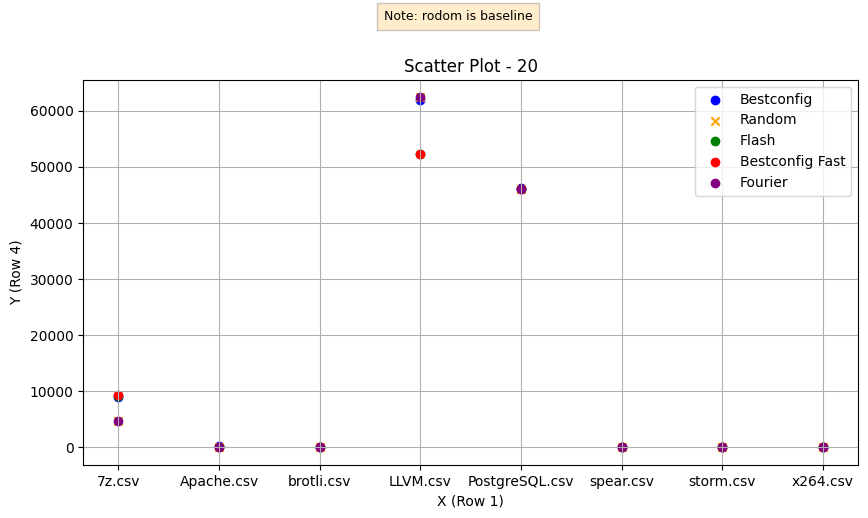

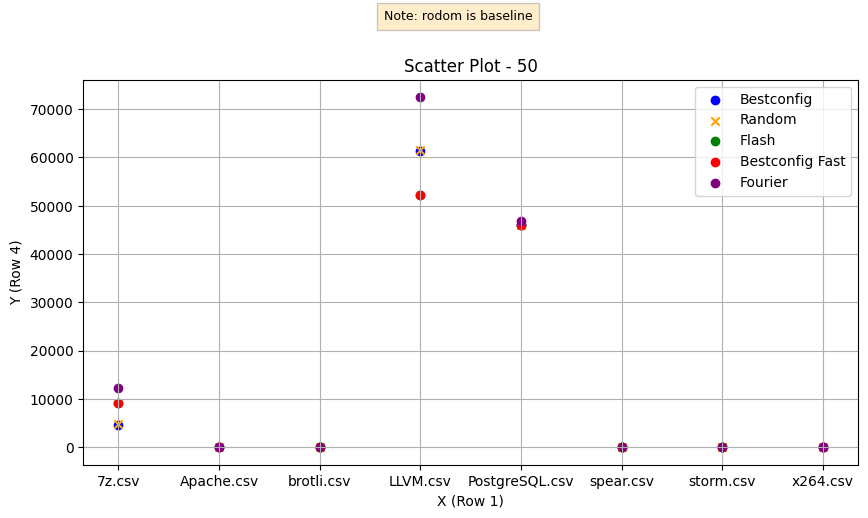

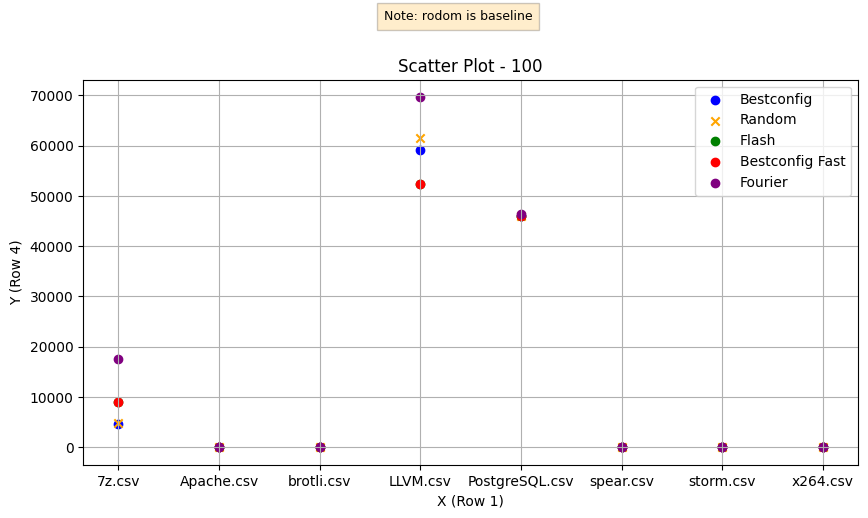

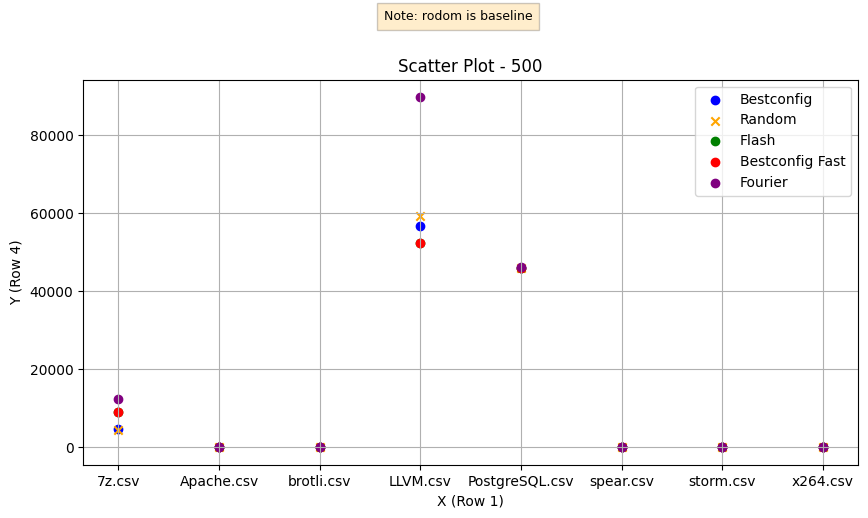

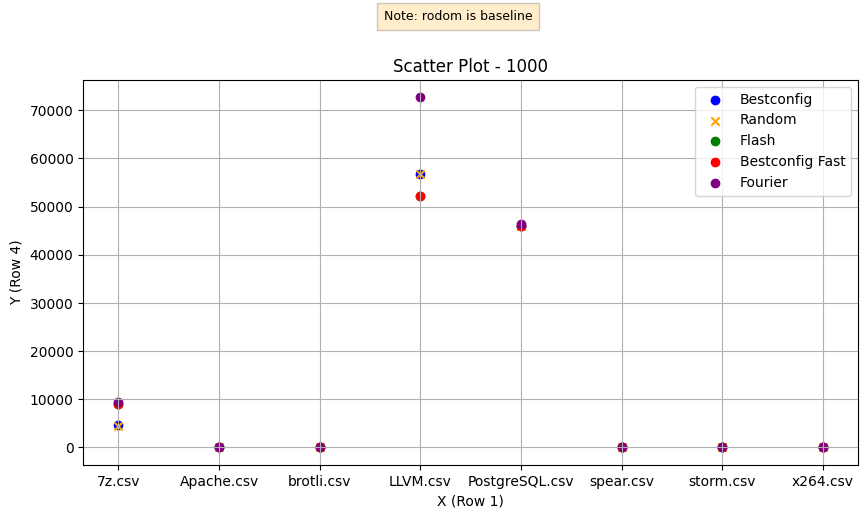

In [2]:
# Load CSV files
folder_path = 'results'
_ , file_list = additional_code.list_files(folder_path)

print(file_list)



dataframes = {}
for file in file_list:
    key = os.path.splitext(file)[0]  # 去掉扩展名作为键，例如 'bestconfig_100'
    dataframes[key] = pd.read_csv(os.path.join(folder_path, file), header=None)

x = {}
y = {}
for key, df in dataframes.items():
    x[key] = df.iloc[0].astype(str)
    y[key] = df.iloc[2].astype(float)


# 方法配置字典：方法名 ➜ (颜色, marker)
methods = {
    'bestconfig': ('blue', 'o'),
    'random': ('orange', 'x'),
    'flash': ('green', 'o'),
    'bestconfig_fast': ('red', 'o'),
    'fourier': ('purple', 'o'),
}

# 数据规模列表
budgets = [20,50,100,500,1000]


for budget in budgets:
    plt.figure(figsize=(10, 5))
    for method, (color, marker) in methods.items():
        key = f"{method}_{budget}"
        plt.scatter(x[key], y[key], color=color, marker=marker, label=method.replace('_', ' ').title())
    
    plt.title(f'Scatter Plot - {budget}')
    plt.xlabel('X (Row 1)')
    plt.ylabel('Y (Row 4)')
    plt.legend()
    plt.grid(True)
    plt.figtext(
        0.5, 1.0,
        f"Note: rodom is baseline" ,ha="center", fontsize=9, bbox={"facecolor": "orange", "alpha": 0.2, "pad": 5}
    )
    plt.show()


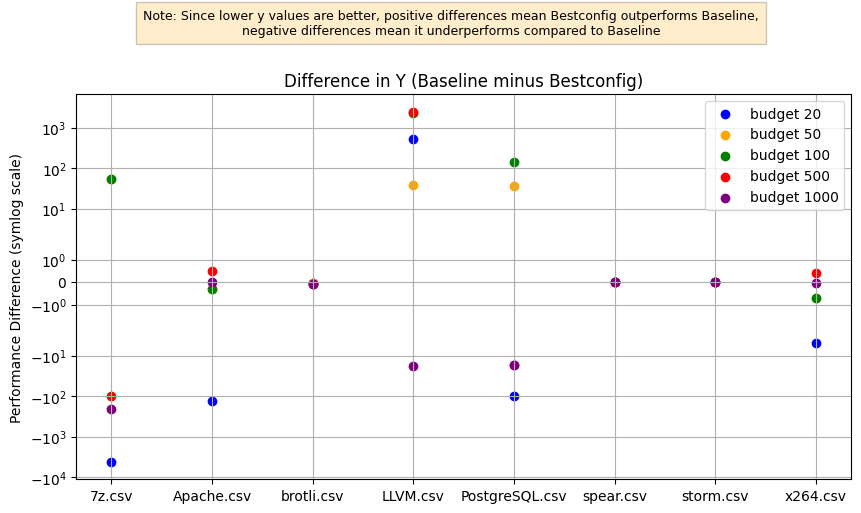

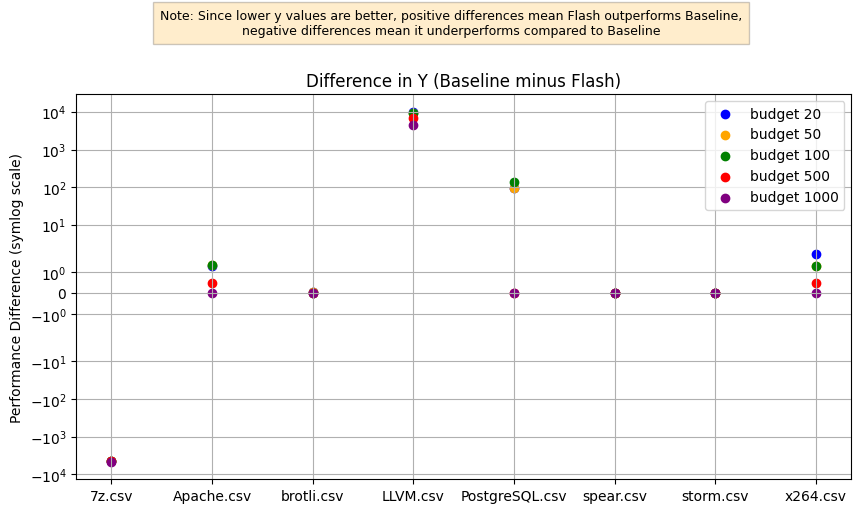

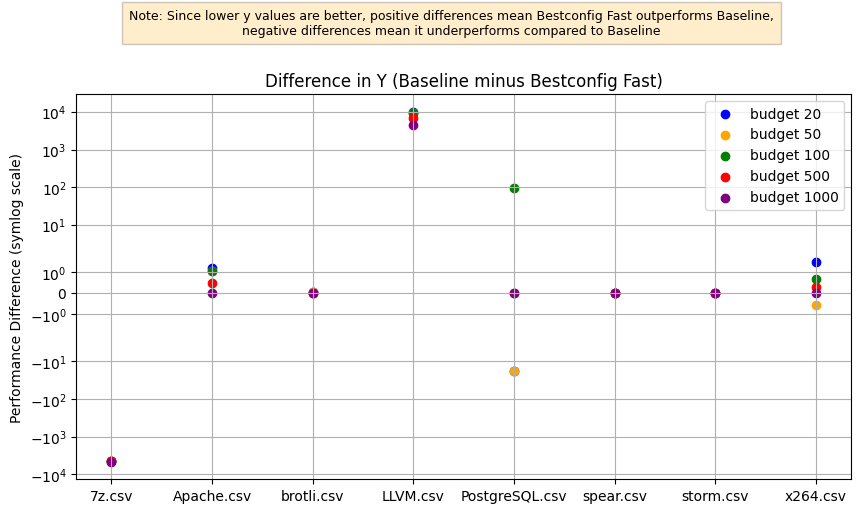

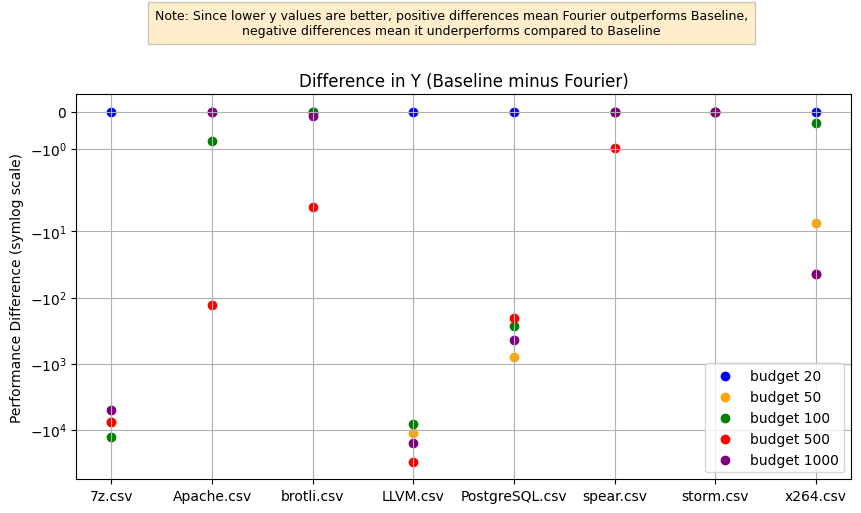

In [3]:

#因为y值用越小越好，所以差值为正数表示比baseline好，为负数表示比baseline差

# 差值计算：方法相对于 baseline 的提升
deviation = {}

for method in methods:
    if method == 'baseline':
        continue  # 不需要计算 baseline 对 baseline 的差值
    for budget in budgets:
        key = f"{method}_{budget}"
        baseline_key = f"random_{budget}"
        deviation[key] = y[baseline_key] - y[key]  # 正值表示比 baseline 好


# 方法对比列表（排除 baseline）
methods_to_compare = ['bestconfig', 'flash', 'bestconfig_fast', 'fourier']
colors = {20: 'blue', 50: 'orange', 100: 'green', 500: 'red', 1000: 'purple'}

for method in methods_to_compare:
    plt.figure(figsize=(10, 5))
    all_values = []

    for budget in budgets:
        base_key = f'random_{budget}'
        comp_key = f'{method}_{budget}'
        diff = deviation[comp_key]
        all_values.extend(diff)

        plt.scatter(x[base_key], diff, color=colors[budget], label=f'budget {budget}')

    # 自动设置 Y 轴比例（处理负数）
    if any(val < 0 for val in all_values):
        plt.yscale('symlog')
        plt.ylabel('Performance Difference (symlog scale)')
    else:
        plt.yscale('log')
        plt.ylabel('Performance Difference')

    # 标题与说明
    plt.title(f'Difference in Y (Baseline minus {method.replace("_", " ").title()})')
    plt.legend()
    plt.grid(True)
    plt.figtext(
        0.5, 1.0,
        f"Note: Since lower y values are better, positive differences mean {method.replace('_', ' ').title()} "
        f"outperforms Baseline,\nnegative differences mean it underperforms compared to Baseline",
        ha="center", fontsize=9, bbox={"facecolor": "orange", "alpha": 0.2, "pad": 5}
    )
    plt.show()

